In [32]:
# Data manipulation and numerical computation
import pandas as pd          # For DataFrame operations
import numpy as np           # For numerical computations

# Visualization libraries
import matplotlib.pyplot as plt   # Static plots
import seaborn as sns             # Statistical data visualization
import plotly.express as px       # Interactive visualizations
import plotly.graph_objects as go
import plotly.io as pio

# Display plots inline in Jupyter Notebook
%matplotlib inline

# Utility class to create sklearn-like dataset object
from sklearn.utils import Bunch


These libraries are used for data handling, visualization, and model building.
Bunch is used to recreate the Boston dataset in a format similar to sklearn.datasets.load_boston.


In [33]:
# URL of the Boston Housing dataset (CMU Stat Library)
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Read raw data from URL
# The dataset is stored in a special format where features span multiple rows
raw_df = pd.read_csv(
    data_url,
    sep=r"\s+",
    skiprows=22,
    header=None
)


In [34]:
# Reconstruct feature matrix X and target vector y
# Every observation spans two rows in the raw file
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]


The dataset is stored in a non-standard format.
We reconstruct X (features) and Y (target) to exactly match the original sklearn Boston dataset.


In [35]:
# Names of the 13 input features
feature_names = np.array([
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
])
# Create sklearn-like dataset object for consistency
load_boston = Bunch(
    data=X,
    target=Y,
    feature_names=feature_names,
    DESCR="Boston Housing Dataset (manually loaded)"
)


Creating a Bunch object allows the dataset to behave like sklearn’s built-in datasets, improving clarity and consistency.


In [36]:

# Convert feature matrix to DataFrame
data = pd.DataFrame(load_boston.data, columns=load_boston.feature_names)

# Add target variable to DataFrame
data["SalePrice"] = load_boston.target



In [37]:
# Preview dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Pandas DataFrames simplify data exploration, visualization, and preprocessing.


In [38]:
print(load_boston.DESCR)
print(data.shape)
data.info()
data.describe()


Boston Housing Dataset (manually loaded)
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


These commands help understand dataset size, data types, and statistical properties.


Exploratory Data Analysis


In [39]:
# Check for missing values
data.isnull().sum()


CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

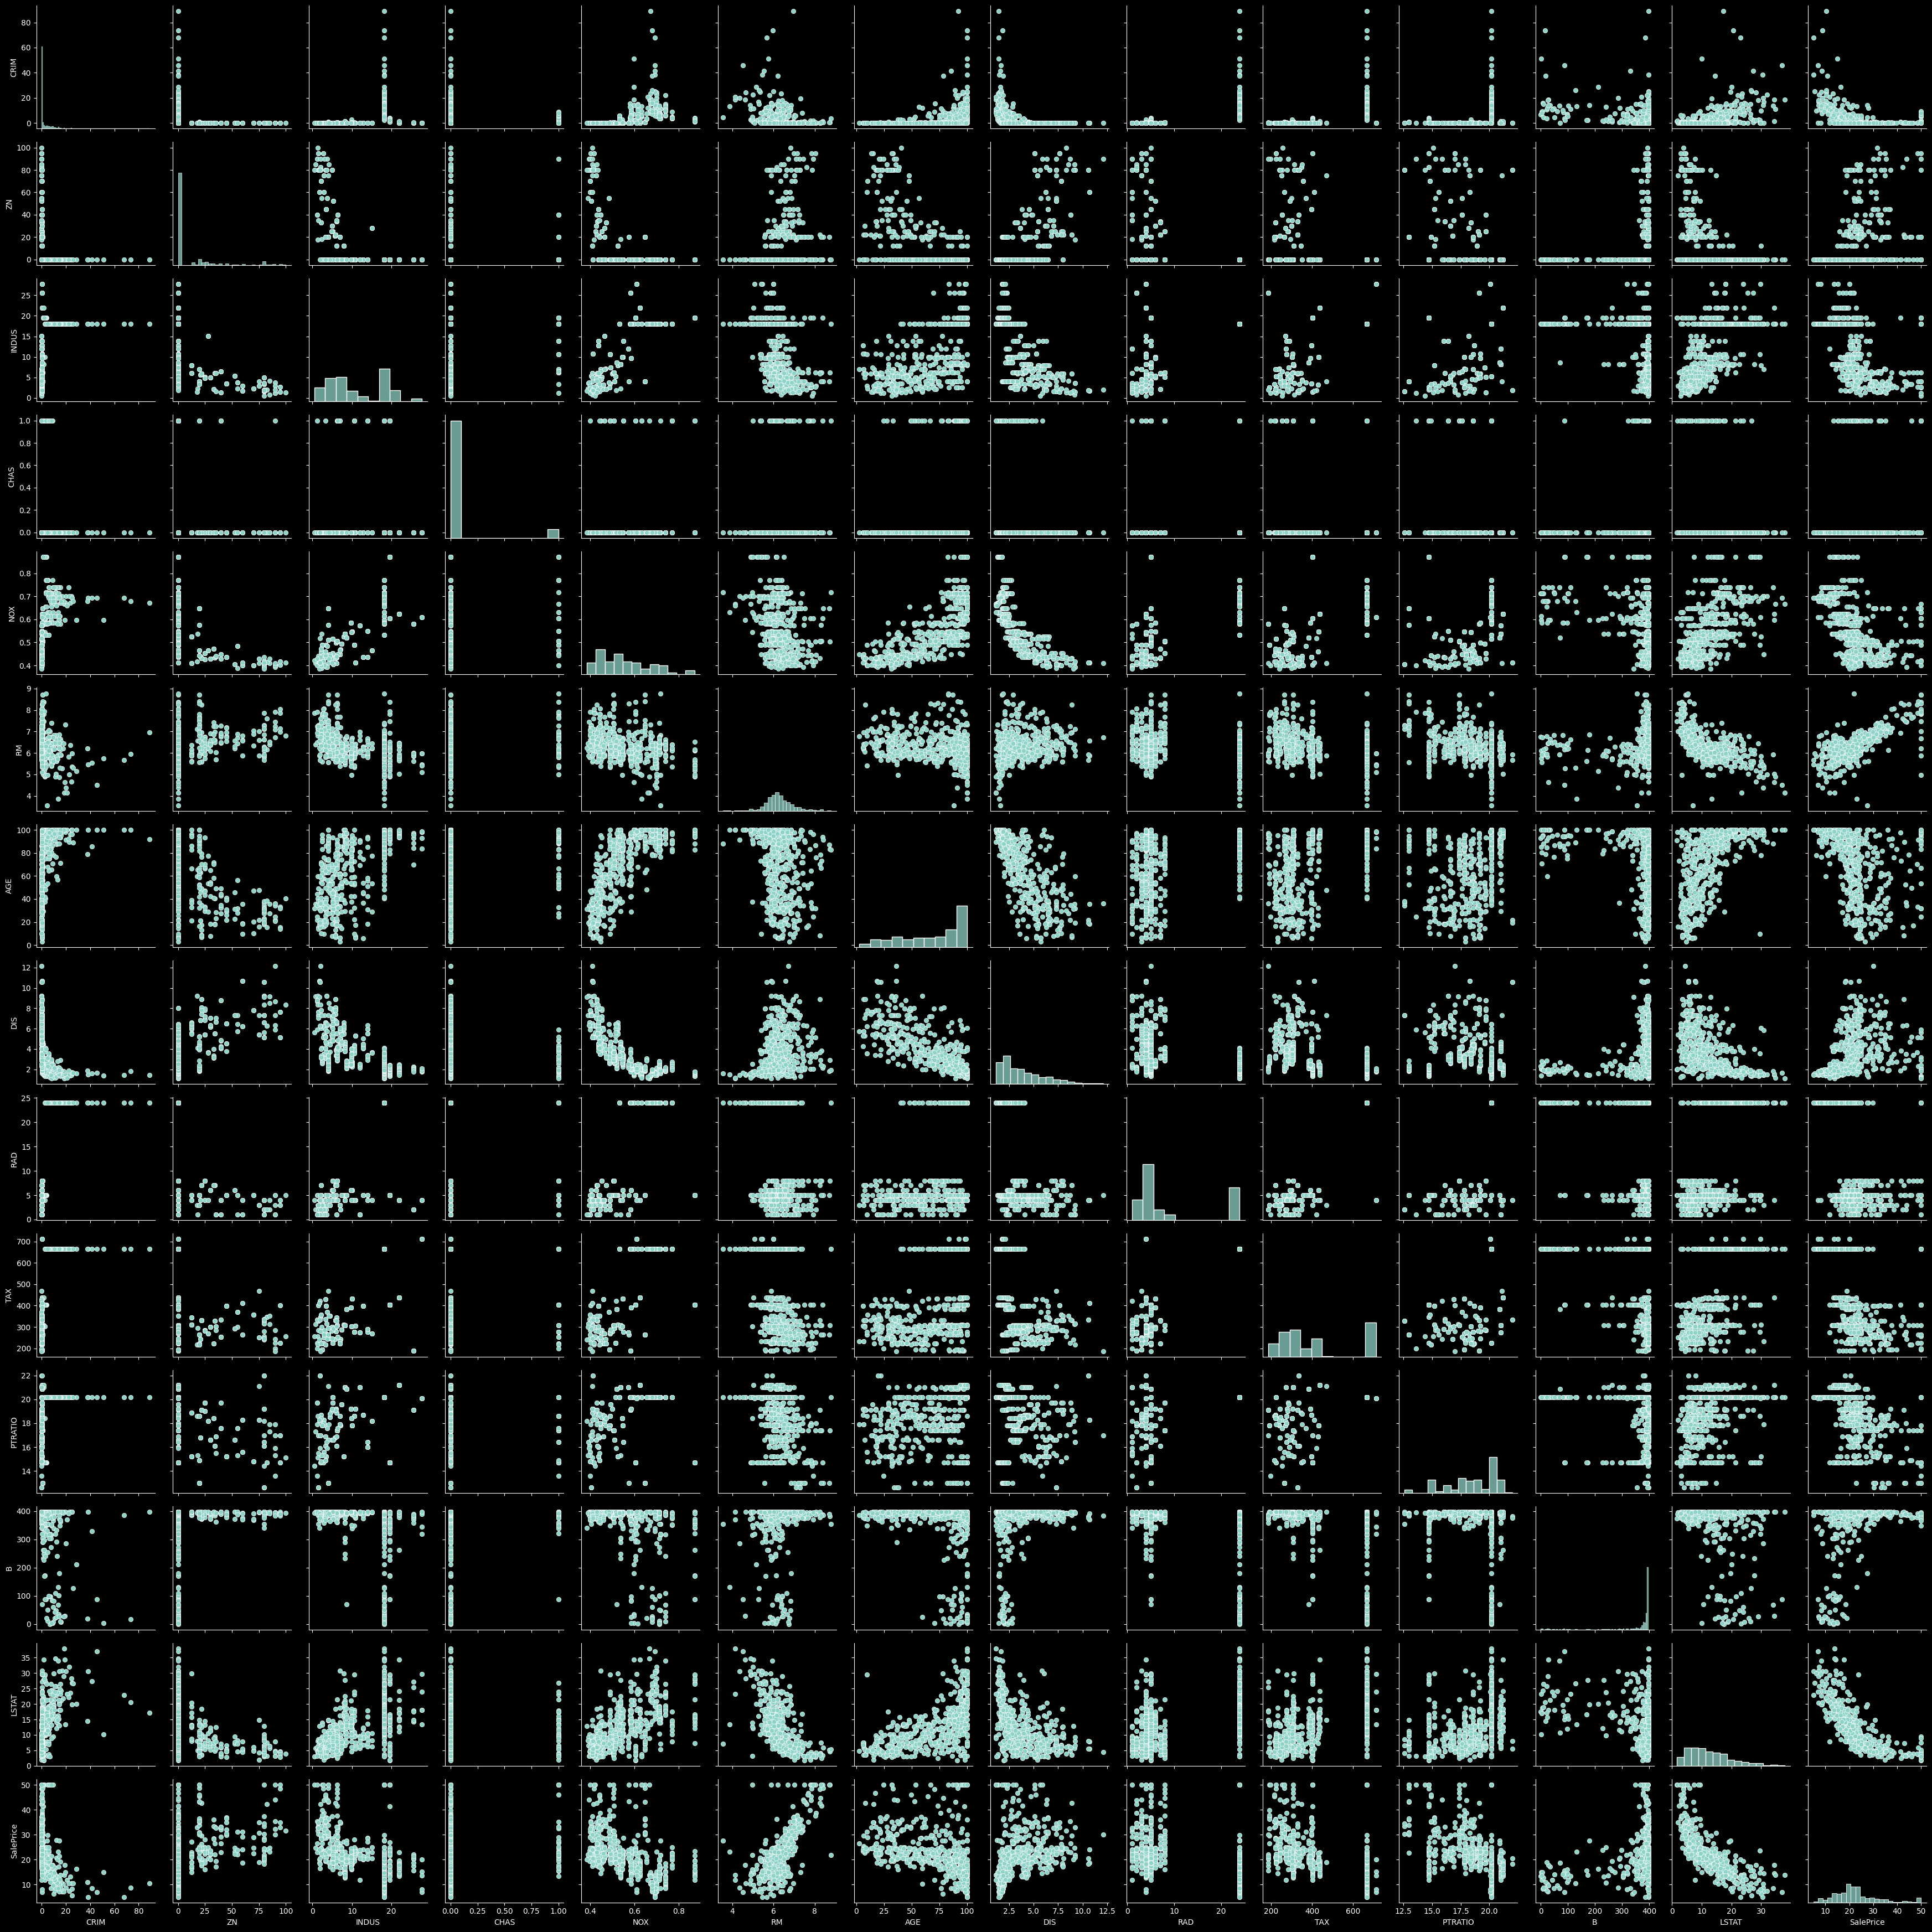

In [40]:
# Pairwise relationships between features
sns.pairplot(data, height=2.5)
plt.tight_layout()

Skewness: 1.1080984082549072
Kurtosis: 1.495196944165818


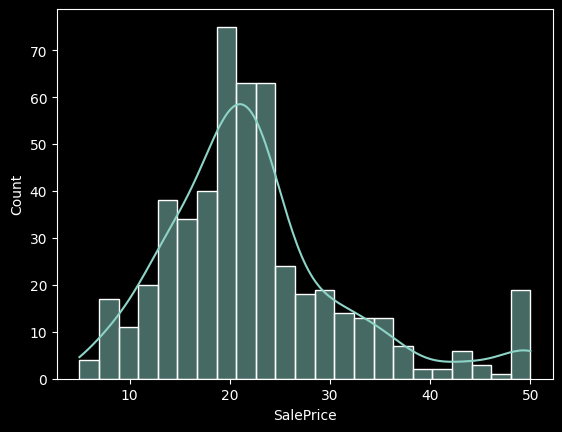

In [41]:
# Distribution of house prices
sns.histplot(data['SalePrice'], kde=True)

print("Skewness:", data['SalePrice'].skew())
print("Kurtosis:", data['SalePrice'].kurt())


Skewness and kurtosis help identify whether the target variable deviates from a normal distribution.


Text(0, 0.5, 'SalePrice')

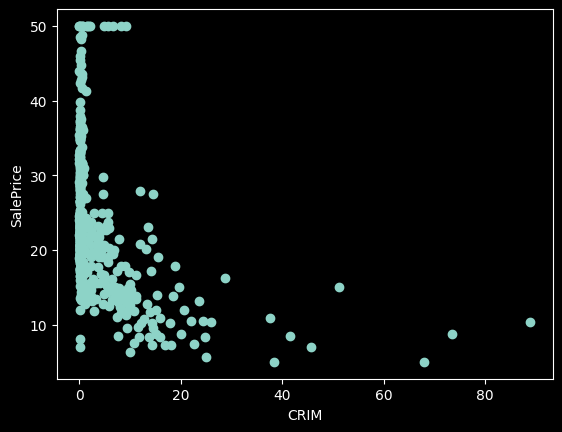

In [42]:
# Relationship between crime rate and house price
plt.scatter(data['CRIM'], data['SalePrice'])
plt.xlabel('CRIM')
plt.ylabel('SalePrice')


Text(0, 0.5, 'SalePrice')

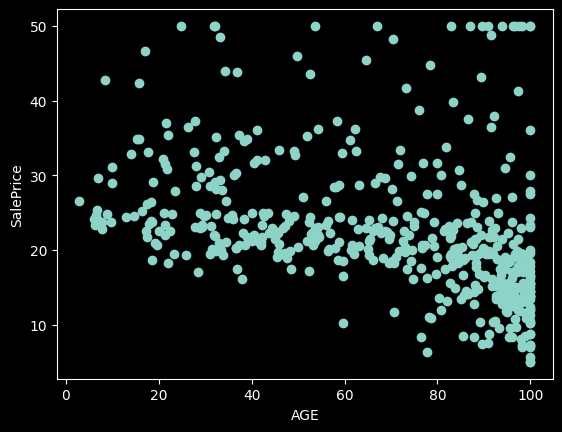

In [43]:
# Relationship between age of houses and price
plt.scatter(data['AGE'], data['SalePrice'])
plt.xlabel('AGE')
plt.ylabel('SalePrice')


Scatter plots help visualize linear or non-linear relationships between features and the target.


mu = 3.09, sigma = 0.39


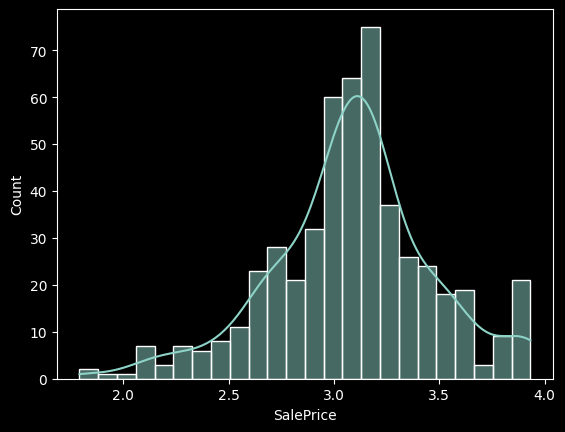

In [44]:
from scipy import stats
from scipy.stats import norm

# Apply log transformation to reduce skewness
data["SalePrice"] = np.log1p(data["SalePrice"])
# Plot transformed target distribution
sns.histplot(data['SalePrice'], kde=True)

(mu, sigma) = norm.fit(data['SalePrice'])
print(f"mu = {mu:.2f}, sigma = {sigma:.2f}")

Log transformation improves normality, which helps linear regression assumptions.


Data Correlation


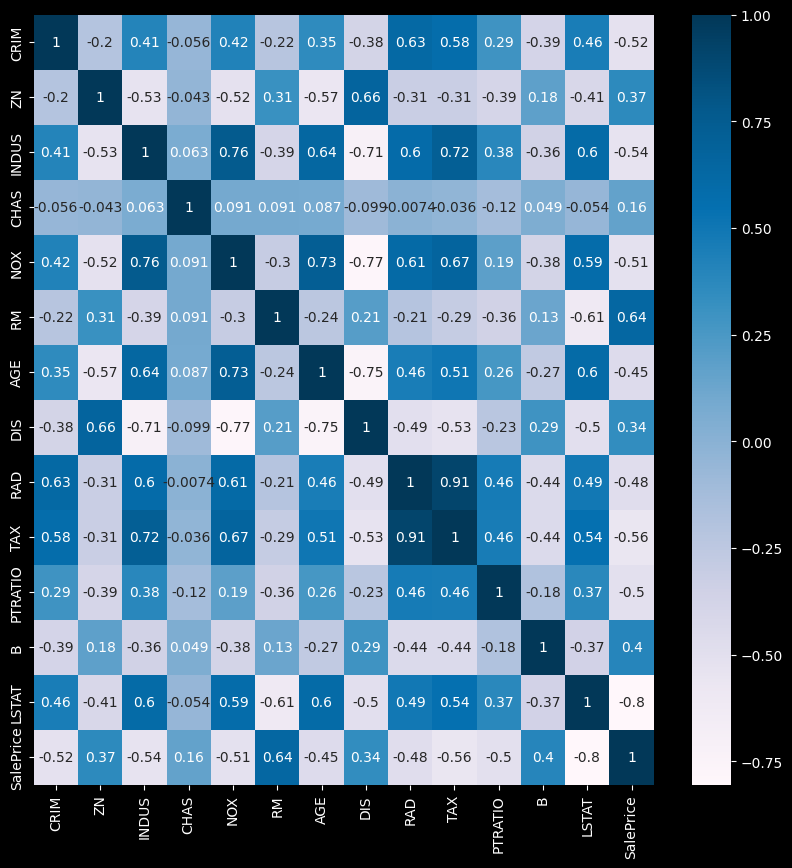

In [45]:
# Compute correlation matrix
plt.figure(figsize=(10, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [46]:
# Select features highly correlated with target
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target > 0.2]

names = relevant_features.index.to_list()
names.remove("SalePrice")

print(names)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


Correlation helps identify features with strong influence on house prices.


MODEL BUILDING


In [47]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [49]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr = LinearRegression()

# Train model
lr.fit(X_train, Y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [50]:
# Predict house prices on test set
predictions = lr.predict(X_test)

print("Actual value:", Y_test.iloc[0])
print("Predicted value:", predictions[0])


Actual value: 3.202746442938317
Predicted value: 3.366894979996959


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Model evaluation
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 0.03532837249537263
RMSE: 0.1879584328924154
R2 Score: 0.7452847696576532


RMSE measures prediction error magnitude, while R² indicates how well the model explains variance in the data.
